In [0]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas excel)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab
import google

In [0]:
# abrir o arquivo csv que contém os dados a serem utilizados durante a prática
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [0]:
#visualizando as 5 primeiras linhas do banco de dados
customers.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40





*  **CustomerID** = Identificação única de um cliente
*  **Gender** = Gênero do cliente
*  **Age** = Idade do consumidor
* **Annual Income** = Renda anual do cliente
* **Spending Score** = 
Pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza do gasto




In [0]:
#verificando a existência de campos nulos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
#verificando a existência de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
#adicionando valores nulos
customers_null=customers.copy()
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

In [0]:
customers_null.info() #verificando as colunas nulas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              145 non-null    float64
 1   Gender                  148 non-null    object 
 2   Age                     148 non-null    float64
 3   Annual Income (k$)      147 non-null    float64
 4   Spending Score (1-100)  143 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [0]:
#analisando o dataset
customers_null.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,NaN,Male,21.0,15.0,81.0
2,NaN,Female,20.0,16.0,NaN
3,4.0,Female,NaN,16.0,NaN
4,5.0,Female,31.0,17.0,40.0


In [0]:
#verificando a existência de campos nulos
customers_null.isnull().sum()

CustomerID                55
Gender                    52
Age                       52
Annual Income (k$)        53
Spending Score (1-100)    57
dtype: int64

In [0]:
#deletando as linhas que possuem algum valor nulo
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
4,5.0,Female,31.0,17.0,40.0
15,16.0,Male,22.0,20.0,79.0
20,21.0,Male,35.0,24.0,35.0
22,23.0,Female,46.0,25.0,5.0
26,27.0,Female,45.0,28.0,32.0
28,29.0,Female,40.0,29.0,31.0
32,33.0,Male,53.0,33.0,4.0
33,34.0,Male,18.0,33.0,92.0
34,35.0,Female,49.0,33.0,14.0


In [0]:
#preenchendo os valores nan com o valor 0
customers_null.fillna(0)

In [0]:
customers_null.describe() #encontra as estatísticas do dataset

In [0]:
#preenchendo os valores médios da coluna
customers_null.fillna(customers_null.mean())

In [0]:
#analisando o banco de dados
customers.describe() #função que retorna uma análise superficial dos dados 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* **count** = número de elementos (linhas) existente no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presentes na coluna
* **min** = menor valor existente na coluna
* **25%** = primeiro quartil dos dados (25%)
* **50%** = segundo quartil dos dados (50%)
* **75%** = terceiro quartil dos dados (75%)
* **max** = valor máximo existente na coluna 

**Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.**

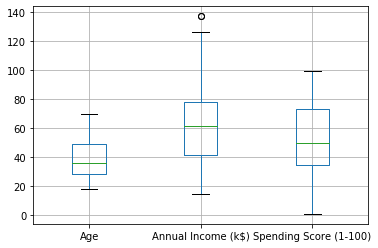

In [0]:
boxplot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])  #constroi o boxplot para as colunas desejadas

**Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o Z-Score.**

In [0]:
#Z-score
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result=np.where(z > threshold)

df_salario_outlier=customers.iloc[result[0]]
#print(z)

In [0]:
df_salario_outlier #todos os usuários com salário anual com possível outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes.**

In [0]:
#analisando a distribuição dos clientes por gênero
sns.countplot(x='Gender', data=customers); # cria o gráfico que conta a quantidade de consumidores existente em cada um dos gêneros
plt.title('Distribuição dos clientes quanto ao gênero');  #adiciona o título no gráfico


**Distribuição dos consumidores pela idade**

In [0]:
#analisando a distribuição dos clientes quanto a idade através do histograma
customers.hist('Age', bins=35);  #seleciona a coluna idade para realizar o histograma
                                 # os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pela idade');# adiciona o título ao gráfico (histograma)
plt.xlabel('Idade');


**Aplicando a codificação aos dados**

In [0]:
cat_df_customers = customers.select_dtypes(include=['object']) #copiando as colunas que são do tipo categoricas

In [0]:
cat_df_customers.head()

""
0
1
2
3
4


**Aplicando o Mapeamento**

In [0]:
replace_map = {'Gender': {'Male': 1, 'Female': 2}}  #define o dicionário a ser utilizado (map)
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist() #encontra a lista das variáveis categóricas
replace_map_comp = {'Gender' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}} #define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [0]:
cat_df_customers_replace =pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')  #realiza a cópia do dataset

In [0]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True) #aplica o mapeamento para o dataset
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


**Aplicando o Label Encodering**

In [0]:
#cat_df_customers_lc = customers
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [0]:
cat_df_customers_lc=customers

In [0]:
cat_df_customers_lc['Gender']=pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [0]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [0]:
# importando o label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #instanciando o objeto

In [0]:
# aplicando a codificação para as colunas categóricas
customers_label=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] =  le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


**One Hot Encoding**

In [0]:
# Get dummies
customers_one_hot=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
#customers_one_hot['Gender']=pd.Categorical(customers_one_hot['Gender'])
customers_one_hot= pd.get_dummies(customers_one_hot)
# customers_one_hot head
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [0]:
customers=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [0]:
# importe OneHotEncoder
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() #instancia o objeto


In [0]:
# aplica o one hot encoding para a coluna 
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()# It returns an numpy array
customers_ohe.shape

(200, 2)

In [0]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.